In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

City_Data = pd.read_csv("data/city_data.csv")
Ride_Data = pd.read_csv("data/ride_data.csv")
Ride_Data.head ()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [32]:
Combined_Data = pd.merge(Ride_Data,City_Data,how='left',on='city')

Combined_Data = Combined_Data.rename(columns={"city":"City","driver_count":"Driver Count","type":"City Type",
                                              "date":"Date","fare":"Fare","ride_id":"Ride ID"})
Combined_Data.to_dense().to_csv("data/combined_data.csv", index = False, sep=',', encoding='utf-8')
Combined_Data.head()

,City,Date,Fare,Ride ID,Driver Count,City Type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [33]:
Combined_Ride = Combined_Data.groupby(['City']+['City Type']+['Driver Count'])

Average_Fare = Combined_Ride['Fare'].mean()

Total_Rides = Combined_Ride['Ride ID'].count()
df = pd.DataFrame({"Average Fare":Average_Fare, "Total Rides":Total_Rides})
df = df.reset_index()

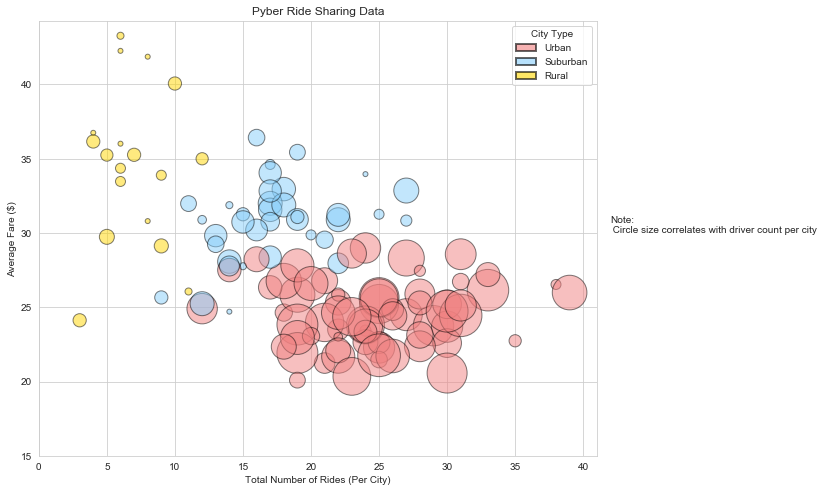

In [34]:
colors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}

Urban = mpatches.Circle((0.5, 0.5), 0.5, facecolor="lightcoral",alpha=.6,edgecolor="black",linewidth=2)
Suburban = mpatches.Circle((0.5, 0.5), 0.5, facecolor="lightskyblue",alpha=.6,edgecolor="black", linewidth=2)
Rural = mpatches.Circle((0.5, 0.5), 0.5, facecolor="gold",alpha=.6,edgecolor="black", linewidth=2)

sns.set_style("whitegrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['Total Rides'], df['Average Fare'], s=df['Driver Count']*25, c=df['City Type'].apply(lambda x:colors[x]),alpha=.5, linewidth=1, edgecolor='black')
ax.legend([Urban,Suburban,Rural],["Urban","Suburban","Rural"],title= 'City Type')

ax.set_xlim(0, max(df['Total Rides'])+2)
ax.set_ylim(15, max(df['Average Fare'])+1)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data")
ax.text(42,30,'Note:\n Circle size correlates with driver count per city')

plt.savefig("data/bubble_graph.png")
plt.show()

## Total Fares by City Type

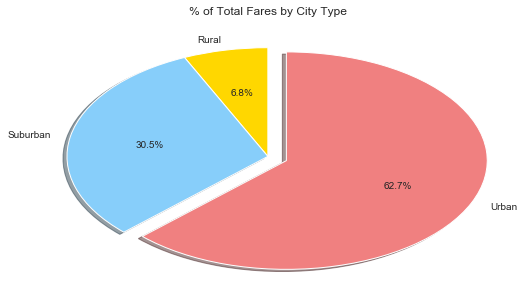

In [35]:
Group_Type = Combined_Data.groupby(['City Type'])
General_Group = Combined_Data.groupby(['City Type'])

Total_Fare = Group_Type['Fare'].sum()

Total_Rides = Group_Type['Ride ID'].count()

Total_Drivers = General_Group['Driver Count'].sum()

Pie_Data = pd.DataFrame({"Total Fare":Total_Fare, "Total Rides":Total_Rides, "Total Drivers":Total_Drivers})
Pie_Data = Pie_Data.reset_index()
Pie_Data

labels = Pie_Data['City Type']
sizes = Pie_Data['Total Fare']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=90)
            
plt.title("% of Total Fares by City Type")
plt.savefig("data/pie_fares_per_city_type.png")
plt.show()

## Total Rides by City Type

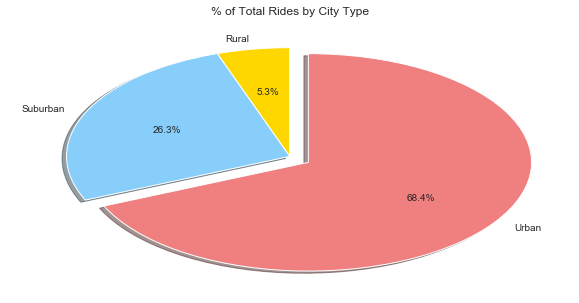

In [36]:
labels = Pie_Data['City Type']

sizes = Pie_Data['Total Rides']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=90)
            
plt.title("% of Total Rides by City Type")
plt.savefig("data/pie_rides_by_city_type.png")
plt.show()

## Total Drivers by City Type

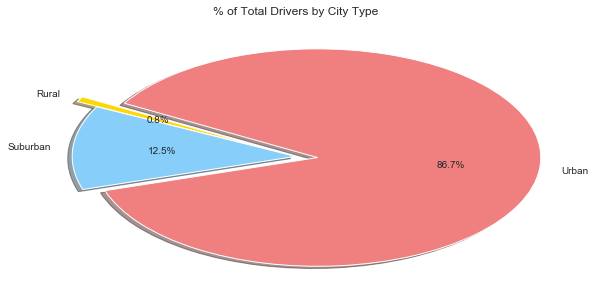

In [37]:
labels = Pie_Data['City Type']

sizes = Pie_Data['Total Drivers']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0, 0.1)

plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=150, radius=1)
            
plt.title("% of Total Drivers by City Type")
plt.savefig("data/pie_drivers_by_city_type.png")
plt.show()

# Analysis
Observation #1: Urban areas account for higher amount and percentage of rides pe day. 

Observation #2: Rural areas have lower fares per ride which results in lower amount of available drivers. 

Observation #3: Suburban areas have a 2:1 ratio for fares/rides based on amount of drivers. Urban areas have a 1:1 ratio for fares/rides based on amount of drivers. 

